In [1]:
import pandas as pd

In [2]:
killings = pd.read_csv('https://raw.githubusercontent.com/misrab/SG_DAT1/master/homework/data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [3]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns = {'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace = True)

In [4]:
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [5]:
# 2. Show the count of missing values in each column

killings.isnull().sum()
# killings[killings.isnull().any(axis=1)] # show rows with missing values

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [6]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.fillna(value="Unknown", inplace=True)

In [7]:
# 4. How many killings were there so far in 2015?

killings[killings.year==2015].year.value_counts()

2015    467
Name: year, dtype: int64

In [8]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [9]:
# 6. How many killings were of unarmed people?

killings[killings.armed=='No'].armed.value_counts()

No    102
Name: armed, dtype: int64

In [10]:
# 7. What percentage of all killings were unarmed? 

# killings.armed.value_counts(normalize=True) * 100.0 # show all armed categories
killings[killings.armed=='No'].armed.value_counts() * 100.0 / len(killings) # only unarmed categories

No    21.841542
Name: armed, dtype: float64

In [11]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().nlargest(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [12]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

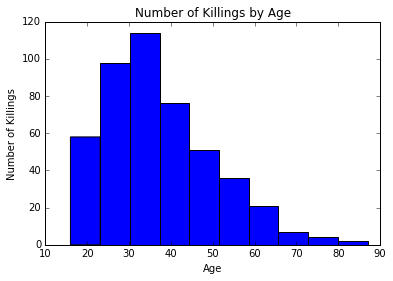

In [13]:
# 10. Display a histogram of ages of all killings

import matplotlib.pyplot as plt
%matplotlib inline

killings.age.plot(kind='hist', bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Killings')
plt.title('Number of Killings by Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108e3b950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109a22890>]], dtype=object)

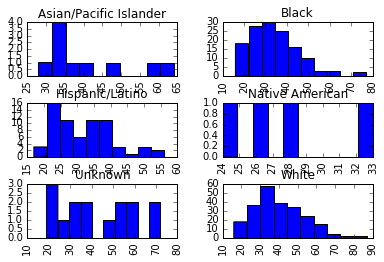

In [14]:
# 11. Show 6 histograms of ages by race

killings.age.hist(by=killings.race)

In [15]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

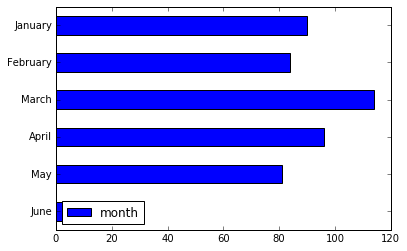

In [114]:
# 13. Show a bar chart with counts of deaths every month

monthtable = killings.month.value_counts()
monthtable = monthtable.to_frame().reindex(['January', 'February', 'March', 'April', 'May', 'June'])
monthtable[::-1].plot(kind='barh')

In [17]:
###################
### Less Morbid ###
###################

majors = pd.read_csv('https://raw.githubusercontent.com/misrab/SG_DAT1/master/homework/data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [18]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

majors = majors.drop('Employed_full_time_year_round', 1)
majors = majors.drop('Major_code', 1)

In [19]:
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000


In [20]:
# 2. Show the count of missing values in each column

majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [21]:
# 3. What are the top 10 highest paying majors?
# Top 10 highest based on median pay

top10pay = majors[['Major', 'Median']].sort_values(by='Median', ascending=False).head(10)
top10pay

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


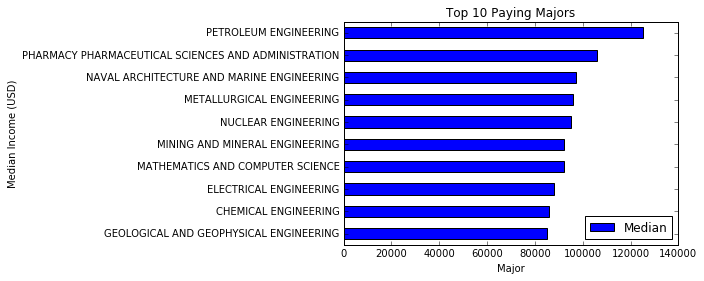

In [22]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

top10pay.iloc[::-1].plot(x='Major', y='Median', kind='barh')
plt.xlabel("Major")
plt.ylabel("Median Income (USD)")
plt.title("Top 10 Paying Majors")

In [23]:
# 5. What is the average median salary for each major category?

major_category_mean = majors.groupby('Major_category').Median.mean()
major_category_mean.sort_values(ascending=False)

Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

In [24]:
# 6. Show only the top 5 paying major categories

major_category_mean.sort_values(ascending=False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

(array([ 25.,  61.,  32.,  31.,  10.,   7.,   5.,   1.,   0.,   1.]),
 array([  35000.,   44000.,   53000.,   62000.,   71000.,   80000.,
          89000.,   98000.,  107000.,  116000.,  125000.]),
 <a list of 10 Patch objects>)

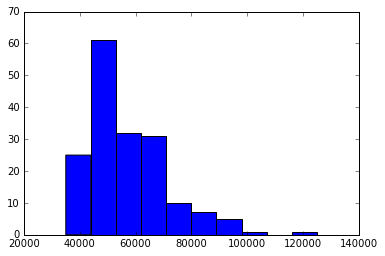

In [25]:
# 7. Plot a histogram of the distribution of median salaries

plt.hist(majors.Median)

(array([ 5.,  1.,  4.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([ 43000.        ,  46475.86206897,  49951.72413793,  53427.5862069 ,
         56903.44827586,  60379.31034483,  63855.17241379,  67331.03448276,
         70806.89655172,  74282.75862069,  77758.62068966]),
 <a list of 10 Patch objects>)

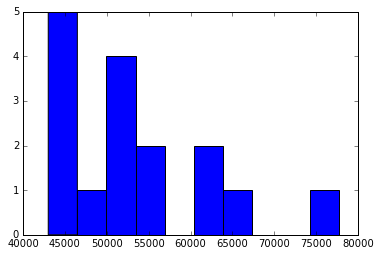

In [26]:
# 8. Plot a histogram of the distribution of median salaries by major category
# use average median salaries of major category

plt.hist(majors.groupby('Major_category').Median.mean())

In [27]:
# 9. What are the top 10 most UNemployed majors?
# What are the unemployment rates?

top10unem = majors[['Major', 'Unemployment_rate']].sort_values(by='Unemployment_rate', ascending=False).head(10)
top10unem

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [28]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

major_category_mean = majors.groupby('Major_category').Unemployment_rate.mean() * 100.0
major_category_mean.sort_values(ascending=False).head(10)

Major_category
Arts                                   8.760052
Psychology & Social Work               7.786702
Interdisciplinary                      7.726897
Humanities & Liberal Arts              6.942871
Communications & Journalism            6.912452
Law & Public Policy                    6.785356
Social Science                         6.568566
Computers & Mathematics                5.943698
Industrial Arts & Consumer Services    5.854567
Physical Sciences                      5.454062
Name: Unemployment_rate, dtype: float64

In [31]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"

# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000,0.711738


In [32]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate'] = 1 - majors.sample_employment_rate
majors.head()


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000,0.711738,0.288262
